In [19]:
#https://github.com/aysebilgegunduz/DominantColor

import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from IPython.display import Image
from PIL import Image
def find_histogram(clt):
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)
    hist = hist.astype("float")
    hist /= hist.sum()
    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX
    # return the bar chart
    return bar

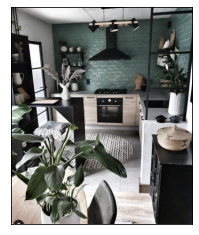

In [20]:
img = cv2.imread("6.jpg")
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #Converts from one colour space to the other
plt.imshow(img2)
plt.xticks([]), plt.yticks([])  # Hides the graph ticks and x / y axis
plt.show()

In [17]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=5) #cluster number
clt.fit(img)
hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

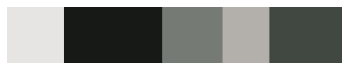

In [18]:
plt.axis("off")
plt.imshow(bar)
plt.show()